# Semana 2: Propiedades y analisis Exploratorio

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import statsmodels.api as sm


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de Datos
df = pd.read_csv('dataset/Tabla_pasantia.csv', sep=',', skiprows=1, names=['test', 'Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'])
df.head()

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
0,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+09,50.0,113.12,11.990
1,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+08,50.0,112.01,11.280
2,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+09,50.0,114.24,11.930
3,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+10,50.0,114.23,13.560
4,Compresion,46,54,2.000000e+10,38.0,76.0,2.50,1.000000e+08,100.0,44.54,1.829


In [3]:
df.describe()

,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
count,123.000000,123.000000,1.230000e+02,123.000000,123.000000,123.000000,1.230000e+02,123.000000,123.000000,123.000000
mean,55.731707,44.268293,4.972927e+11,85.755610,57.706016,60.978374,6.327236e+08,148.781301,69.446337,3.347337
std,9.108700,9.108700,1.778146e+12,116.549688,79.328597,77.759327,4.536258e+09,132.104260,15.054142,1.893285
min,35.000000,35.000000,1.000000e+09,2.000000,2.000000,1.750000,1.000000e+07,0.100000,39.061758,1.078755
25%,50.000000,36.000000,1.000000e+10,27.500000,5.500000,5.500000,4.000000e+07,50.000000,60.142121,2.478769
50%,57.000000,43.000000,5.000000e+10,37.000000,16.000000,42.970000,1.000000e+08,50.000000,66.387591,2.932273
75%,64.000000,50.000000,1.000000e+11,74.300000,64.000000,75.000000,1.000000e+08,300.000000,76.458909,3.524915
max,65.000000,65.000000,1.000000e+13,404.000000,269.000000,269.000000,5.000000e+10,600.000000,114.661458,13.560000


## Se define df2 a la Compresión

In [4]:
df2 = df[df['test'] == "Compresion"]
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
0,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+09,50.0,113.120000,11.990000
1,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+08,50.0,112.010000,11.280000
2,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+09,50.0,114.240000,11.930000
3,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+10,50.0,114.230000,13.560000
4,Compresion,46,54,2.000000e+10,38.00,76.00,2.50,1.000000e+08,100.0,44.540000,1.829000
6,Compresion,65,35,1.000000e+11,2.00,2.00,4.00,5.000000e+07,300.0,56.654000,3.432000
8,Compresion,64,36,1.000000e+12,27.05,27.05,27.05,1.000000e+08,10.0,64.144394,2.731343
24,Compresion,50,50,1.000000e+11,6.00,12.00,6.00,7.000000e+08,0.1,73.125300,3.358491
25,Compresion,64,36,5.000000e+11,27.50,5.50,55.00,1.000000e+08,300.0,91.842000,4.625000
26,Compresion,64,36,5.000000e+11,27.50,5.50,55.00,1.000000e+08,300.0,77.636000,2.816000


In [5]:
df2.describe()

,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
count,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000
mean,56.322034,43.677966,9.132373e+11,87.614237,57.388814,63.237627,1.126271e+09,157.120339,68.711553,3.440789
std,8.861853,8.861853,2.497433e+12,130.280593,88.303849,86.015438,6.535429e+09,125.421961,16.515384,2.548584
min,36.000000,35.000000,1.000000e+09,2.000000,2.000000,1.750000,1.000000e+07,0.100000,44.540000,1.078755
25%,50.000000,36.000000,1.000000e+10,15.000000,5.500000,5.500000,5.000000e+07,50.000000,60.877659,2.301746
50%,60.000000,40.000000,1.000000e+11,36.000000,12.000000,16.000000,1.000000e+08,100.000000,64.144394,2.764000
75%,64.000000,50.000000,5.000000e+11,69.800000,69.400000,65.000000,1.000000e+08,300.000000,71.153634,3.349750
max,65.000000,64.000000,1.000000e+13,404.000000,269.000000,269.000000,5.000000e+10,400.000000,114.240000,13.560000


## Busqueda Datos Atipicos en df2

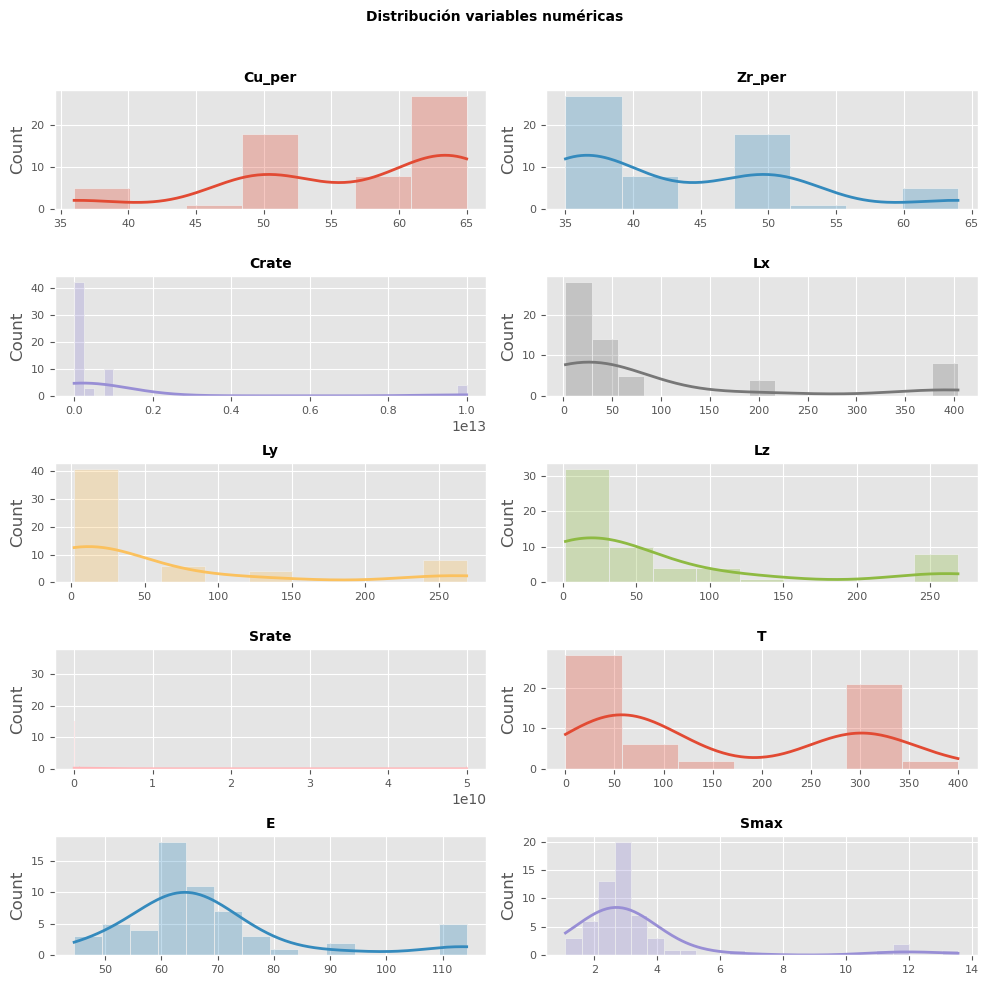

In [6]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10)) # Numero columnas y filas en caso en caso que haya mas variables
axes = axes.flat
columnas_numeric = df2.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df2,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### BoxPlot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4bc4d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4bc5330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4bc4ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4bc58d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4bc5ba0>],
 'means': []}

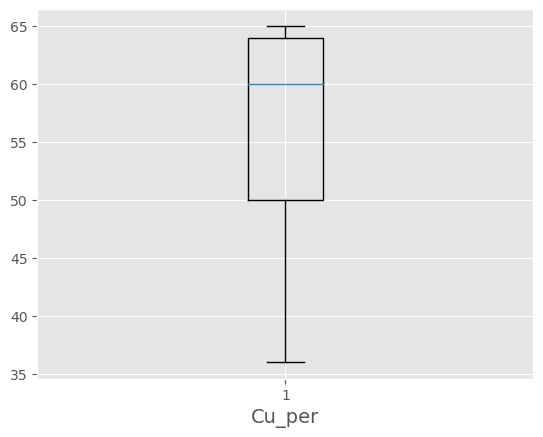

In [7]:
#Cu_per
plt.xlabel('Cu_per', fontsize=14)
plt.boxplot(df2['Cu_per'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4a13970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4a13f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4a136a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4a3c4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4a3c7c0>],
 'means': []}

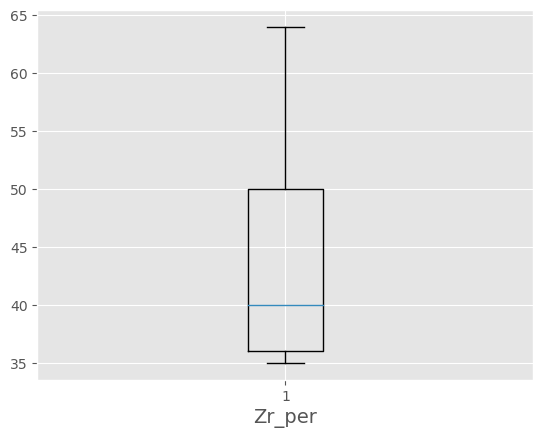

In [8]:
#Zr_per
plt.xlabel('Zr_per', fontsize=14)
plt.boxplot(df2['Zr_per'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4aa6230>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4aa67d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4aa5f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4aa6d70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4aa7040>],
 'means': []}

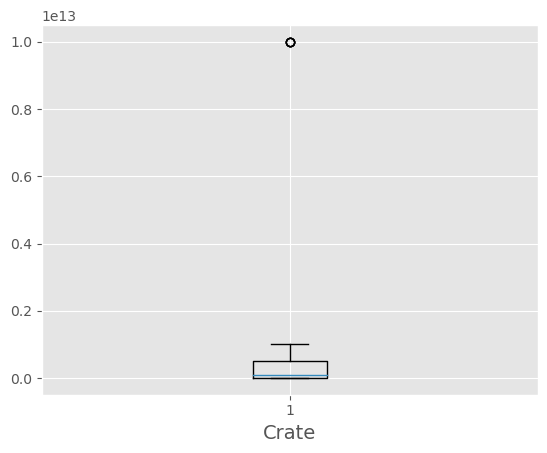

In [9]:
#Crate
plt.xlabel('Crate', fontsize=14)
plt.boxplot(df2['Crate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4ef0970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4ef0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4ef06a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4ef14b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4ef1780>],
 'means': []}

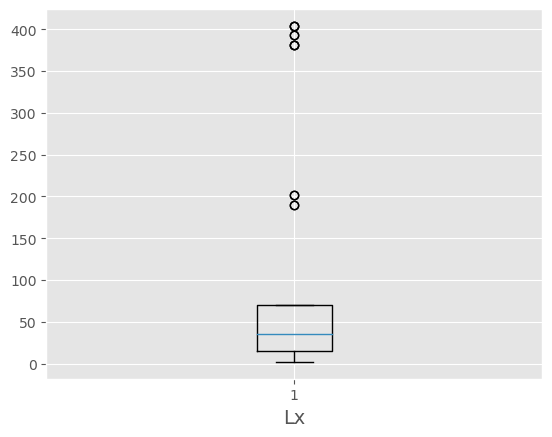

In [10]:
#Lx
plt.xlabel('Lx', fontsize=14)
plt.boxplot(df2['Lx'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4f6c400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4f6c940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4f6c130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4f6cee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4f6d1b0>],
 'means': []}

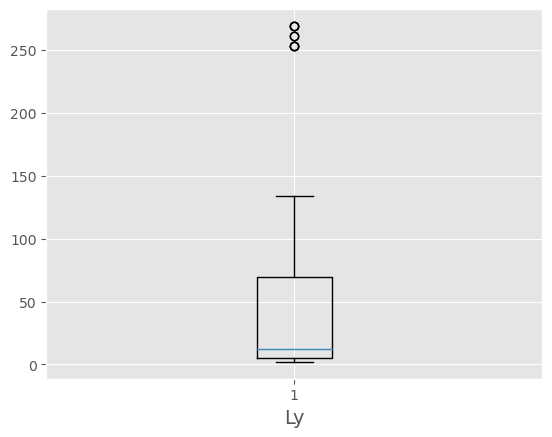

In [11]:
#Ly
plt.xlabel('Ly', fontsize=14)
plt.boxplot(df2['Ly'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4fb2890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4fb2e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4fb25c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4fb3460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4fb3730>],
 'means': []}

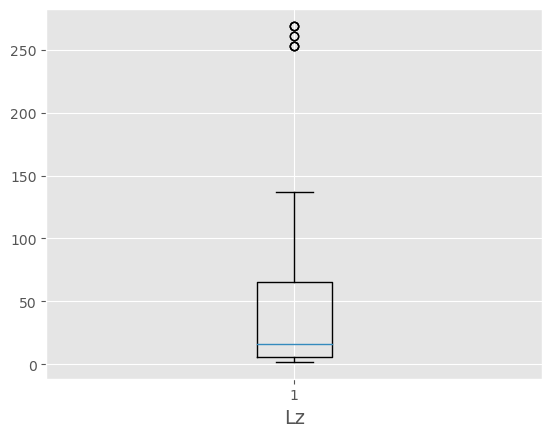

In [12]:
#Lz
plt.xlabel('Lz', fontsize=14)
plt.boxplot(df2['Lz'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4e30bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4e31150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4e308e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4e31690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4e31960>],
 'means': []}

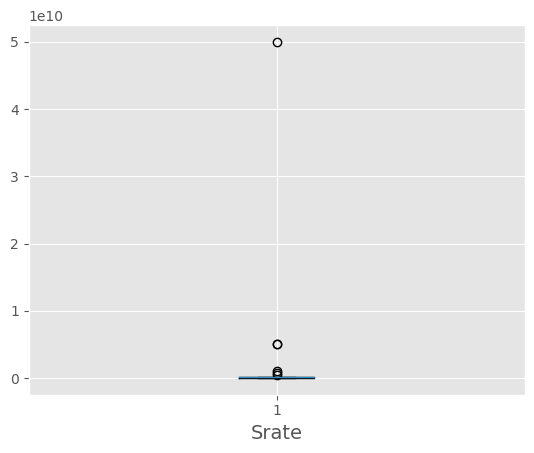

In [13]:
#Srate
plt.xlabel('Srate', fontsize=14)
plt.boxplot(df2['Srate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4e7b250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4e7b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4e7af80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4e7bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4eb00a0>],
 'means': []}

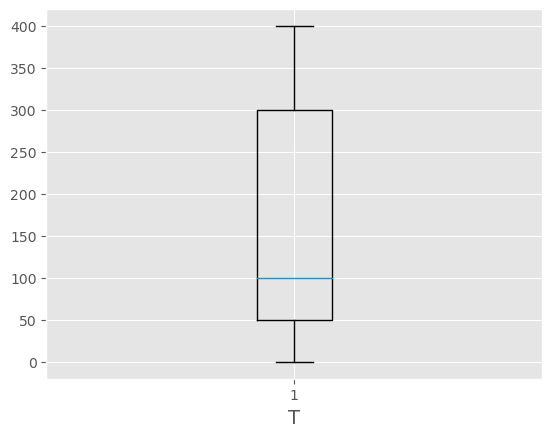

In [14]:
#T
plt.xlabel('T', fontsize=14)
plt.boxplot(df2['T'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4cea890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4ceae30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4cea5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4ceb3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4ceb6a0>],
 'means': []}

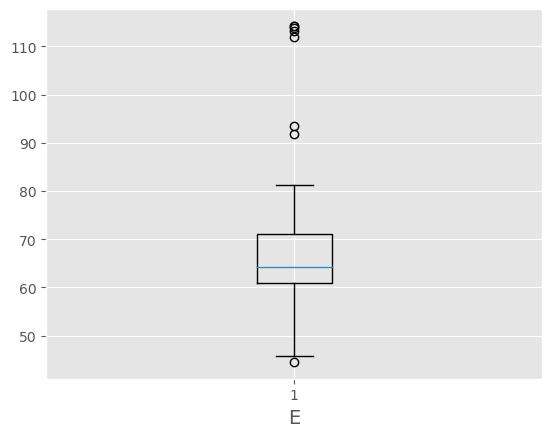

In [15]:
#E
plt.xlabel('E', fontsize=14)
plt.boxplot(df2['E'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44a4d69570>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44a4d69b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44a4d692a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44a4d6a0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44a4d6a380>],
 'means': []}

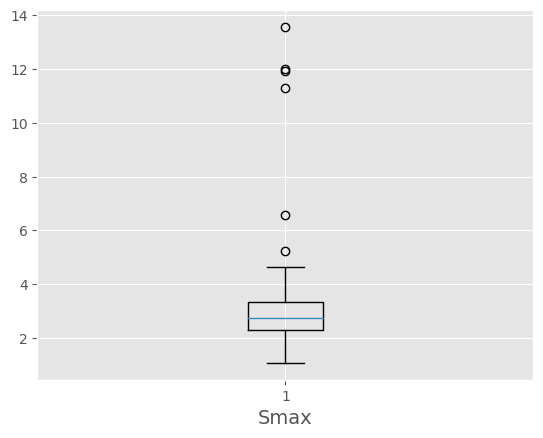

In [16]:
#Smax
plt.xlabel('Smax', fontsize=14)
plt.boxplot(df2['Smax'])

## Identificación de Outliers

Con respecto al Uso de Boxplot , se esitma que hay presencia de Ouliers en las Variables:
- Smax
- Srate
- Lz
- Ly
- Lx
- Crate
- E

In [17]:
df2 = df2.sort_values('Smax')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
57,Compresion,64,36,1.000000e+13,22.00,4.40,44.00,4.000000e+07,50.0,45.937185,1.078755
56,Compresion,64,36,1.000000e+12,22.00,4.40,44.00,4.000000e+07,50.0,45.785593,1.107807
55,Compresion,64,36,1.000000e+11,22.00,4.40,44.00,4.000000e+07,50.0,51.745774,1.420787
65,Compresion,50,50,1.000000e+10,21.50,4.30,43.00,4.000000e+07,50.0,60.498067,1.762929
54,Compresion,64,36,1.000000e+10,22.00,4.40,44.00,4.000000e+07,50.0,62.977149,1.780669
97,Compresion,64,36,1.000000e+12,21.49,4.29,42.97,4.000000e+07,300.0,63.230475,1.793185
4,Compresion,46,54,2.000000e+10,38.00,76.00,2.50,1.000000e+08,100.0,44.540000,1.829000
109,Compresion,36,64,1.000000e+10,404.00,269.00,269.00,1.000000e+08,400.0,53.452462,1.947408
53,Compresion,64,36,1.000000e+09,22.00,4.40,44.00,4.000000e+07,50.0,60.521001,2.072850
49,Compresion,50,50,1.000000e+11,10.00,10.00,10.00,1.000000e+07,100.0,50.475148,2.128079


Valores 13.56, 11.99, 11.93, 11.28 ID #3, #0, #2, #1

In [18]:
df2 = df2.sort_values('Srate')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
71,Compresion,50,50,1.000000e+11,5.00,5.00,5.00,1.000000e+07,50.0,62.460822,2.627748
49,Compresion,50,50,1.000000e+11,10.00,10.00,10.00,1.000000e+07,100.0,50.475148,2.128079
57,Compresion,64,36,1.000000e+13,22.00,4.40,44.00,4.000000e+07,50.0,45.937185,1.078755
28,Compresion,60,40,5.000000e+10,40.00,5.00,120.00,4.000000e+07,130.0,62.827113,2.989739
31,Compresion,60,40,5.000000e+10,20.00,5.00,120.00,4.000000e+07,300.0,59.614711,2.296848
53,Compresion,64,36,1.000000e+09,22.00,4.40,44.00,4.000000e+07,50.0,60.521001,2.072850
66,Compresion,64,36,1.000000e+10,60.00,7.70,137.00,4.000000e+07,50.0,93.381389,5.238532
29,Compresion,60,40,5.000000e+10,40.00,5.00,120.00,4.000000e+07,300.0,54.285908,2.400016
97,Compresion,64,36,1.000000e+12,21.49,4.29,42.97,4.000000e+07,300.0,63.230475,1.793185
56,Compresion,64,36,1.000000e+12,22.00,4.40,44.00,4.000000e+07,50.0,45.785593,1.107807


In [19]:
# Un valor significativamente mayor con ID #3

In [20]:
df2 = df2.sort_values('Lz')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
3,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+10,50.0,114.230000,13.560000
0,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+09,50.0,113.120000,11.990000
1,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+08,50.0,112.010000,11.280000
2,Compresion,57,43,1.000000e+12,69.80,69.40,1.75,5.000000e+09,50.0,114.240000,11.930000
4,Compresion,46,54,2.000000e+10,38.00,76.00,2.50,1.000000e+08,100.0,44.540000,1.829000
99,Compresion,64,36,1.000000e+10,32.00,64.00,4.00,1.000000e+08,50.0,113.816288,6.587500
6,Compresion,65,35,1.000000e+11,2.00,2.00,4.00,5.000000e+07,300.0,56.654000,3.432000
71,Compresion,50,50,1.000000e+11,5.00,5.00,5.00,1.000000e+07,50.0,62.460822,2.627748
82,Compresion,64,36,1.000000e+13,5.50,5.50,5.50,1.000000e+08,300.0,75.554829,3.700512
81,Compresion,64,36,1.000000e+12,5.50,5.50,5.50,1.000000e+08,300.0,71.130986,3.341009


In [21]:
# valores 269, 261, 253 (#105 hacia abajo)

In [22]:
df2 = df2.sort_values('Ly')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
6,Compresion,65,35,1.000000e+11,2.00,2.00,4.00,5.000000e+07,300.0,56.654000,3.432000
97,Compresion,64,36,1.000000e+12,21.49,4.29,42.97,4.000000e+07,300.0,63.230475,1.793185
65,Compresion,50,50,1.000000e+10,21.50,4.30,43.00,4.000000e+07,50.0,60.498067,1.762929
57,Compresion,64,36,1.000000e+13,22.00,4.40,44.00,4.000000e+07,50.0,45.937185,1.078755
54,Compresion,64,36,1.000000e+10,22.00,4.40,44.00,4.000000e+07,50.0,62.977149,1.780669
56,Compresion,64,36,1.000000e+12,22.00,4.40,44.00,4.000000e+07,50.0,45.785593,1.107807
55,Compresion,64,36,1.000000e+11,22.00,4.40,44.00,4.000000e+07,50.0,51.745774,1.420787
53,Compresion,64,36,1.000000e+09,22.00,4.40,44.00,4.000000e+07,50.0,60.521001,2.072850
30,Compresion,60,40,5.000000e+10,20.00,5.00,120.00,4.000000e+07,130.0,67.472079,2.826452
29,Compresion,60,40,5.000000e+10,40.00,5.00,120.00,4.000000e+07,300.0,54.285908,2.400016


In [23]:
# valores 269, 261, 253 (#105 hacia abajo)

In [24]:
df2 = df2.sort_values('Lx')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
6,Compresion,65,35,1.000000e+11,2.00,2.00,4.00,5.000000e+07,300.0,56.654000,3.432000
71,Compresion,50,50,1.000000e+11,5.00,5.00,5.00,1.000000e+07,50.0,62.460822,2.627748
74,Compresion,64,36,1.000000e+11,5.50,5.50,5.50,1.000000e+08,300.0,64.906001,2.932273
77,Compresion,64,36,1.000000e+11,5.50,5.50,5.50,1.000000e+08,300.0,69.193595,2.883359
82,Compresion,64,36,1.000000e+13,5.50,5.50,5.50,1.000000e+08,300.0,75.554829,3.700512
81,Compresion,64,36,1.000000e+12,5.50,5.50,5.50,1.000000e+08,300.0,71.130986,3.341009
75,Compresion,64,36,1.000000e+12,5.50,5.50,5.50,1.000000e+08,300.0,81.289778,3.381433
76,Compresion,64,36,1.000000e+13,5.50,5.50,5.50,1.000000e+08,300.0,73.659648,3.878799
80,Compresion,64,36,1.000000e+11,5.50,5.50,5.50,1.000000e+08,300.0,71.059746,2.915205
78,Compresion,64,36,1.000000e+12,5.50,5.50,5.50,1.000000e+08,300.0,66.663598,3.330736


In [25]:
# Tanto en X,Y, Z hay presencia de datos que son más grande lo usual. ID de estos #120, 122, 119, 121, 105, 110, 102, 104, 101, 109, 100, 103

In [26]:
df2 = df2.sort_values('Crate')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
53,Compresion,64,36,1.000000e+09,22.00,4.40,44.00,4.000000e+07,50.0,60.521001,2.072850
103,Compresion,36,64,1.000000e+10,404.00,269.00,269.00,1.000000e+08,50.0,64.110000,3.062327
54,Compresion,64,36,1.000000e+10,22.00,4.40,44.00,4.000000e+07,50.0,62.977149,1.780669
65,Compresion,50,50,1.000000e+10,21.50,4.30,43.00,4.000000e+07,50.0,60.498067,1.762929
99,Compresion,64,36,1.000000e+10,32.00,64.00,4.00,1.000000e+08,50.0,113.816288,6.587500
66,Compresion,64,36,1.000000e+10,60.00,7.70,137.00,4.000000e+07,50.0,93.381389,5.238532
120,Compresion,64,36,1.000000e+10,190.00,126.00,63.00,5.000000e+07,300.0,64.142517,2.857629
122,Compresion,64,36,1.000000e+10,190.00,126.00,63.00,1.000000e+08,100.0,71.176282,3.534108
109,Compresion,36,64,1.000000e+10,404.00,269.00,269.00,1.000000e+08,400.0,53.452462,1.947408
121,Compresion,36,64,1.000000e+10,202.00,134.00,67.00,1.000000e+08,100.0,61.234317,2.877304


In [27]:
# Las Columnas de ID 79,76,57,82 son considerablemente más grandes.

# data frame nuevo

In [28]:
# Se formulará un nuevo DataFrame sin estos datos.

df_WO = df2.drop([0,1,2,3,57,76,79,82,120,122,119,121,105,110,102,104,101,109,100,103])
df_WO

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
53,Compresion,64,36,1.000000e+09,22.00,4.40,44.00,4.000000e+07,50.0,60.521001,2.072850
54,Compresion,64,36,1.000000e+10,22.00,4.40,44.00,4.000000e+07,50.0,62.977149,1.780669
65,Compresion,50,50,1.000000e+10,21.50,4.30,43.00,4.000000e+07,50.0,60.498067,1.762929
99,Compresion,64,36,1.000000e+10,32.00,64.00,4.00,1.000000e+08,50.0,113.816288,6.587500
66,Compresion,64,36,1.000000e+10,60.00,7.70,137.00,4.000000e+07,50.0,93.381389,5.238532
4,Compresion,46,54,2.000000e+10,38.00,76.00,2.50,1.000000e+08,100.0,44.540000,1.829000
31,Compresion,60,40,5.000000e+10,20.00,5.00,120.00,4.000000e+07,300.0,59.614711,2.296848
30,Compresion,60,40,5.000000e+10,20.00,5.00,120.00,4.000000e+07,130.0,67.472079,2.826452
28,Compresion,60,40,5.000000e+10,40.00,5.00,120.00,4.000000e+07,130.0,62.827113,2.989739
29,Compresion,60,40,5.000000e+10,40.00,5.00,120.00,4.000000e+07,300.0,54.285908,2.400016


# Comprobación Posterior a Primer Filtrado

In [29]:
# Se Utilizará el grafico Quantil-Quantil

In [30]:
list(df_WO)

['test',
 'Cu_per',
 'Zr_per',
 'Crate',
 'Lx',
 'Ly',
 'Lz',
 'Srate',
 'T',
 'E',
 'Smax']

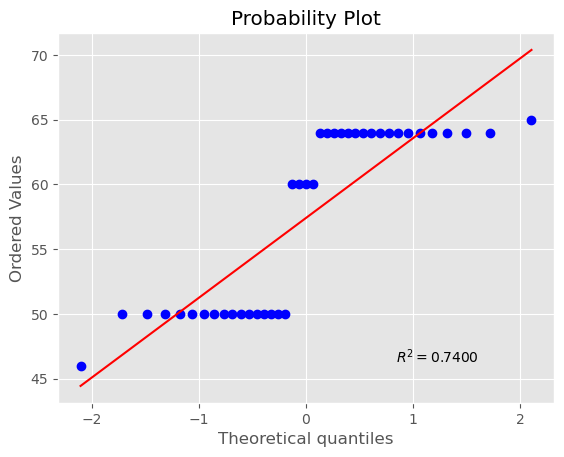

In [31]:
stats.probplot(df_WO['Cu_per'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

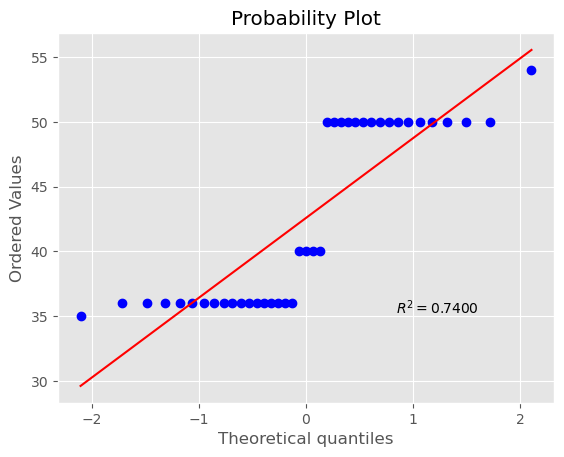

In [32]:
stats.probplot(df_WO['Zr_per'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

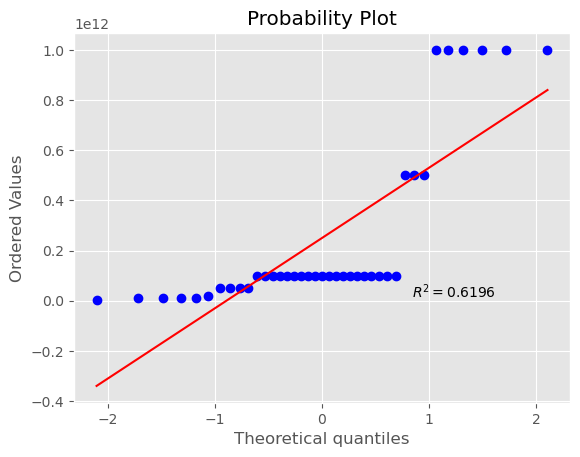

In [33]:
stats.probplot(df_WO['Crate'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

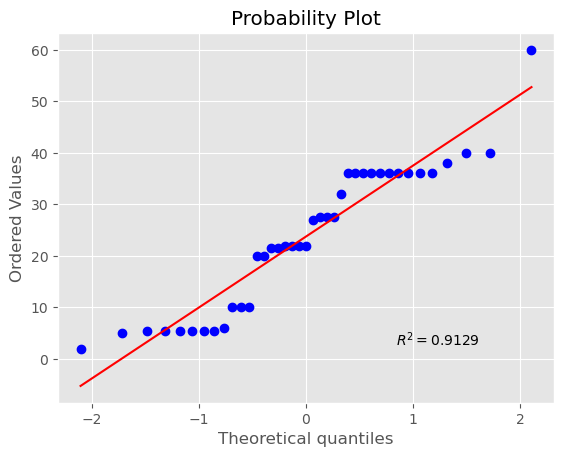

In [34]:
stats.probplot(df_WO['Lx'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

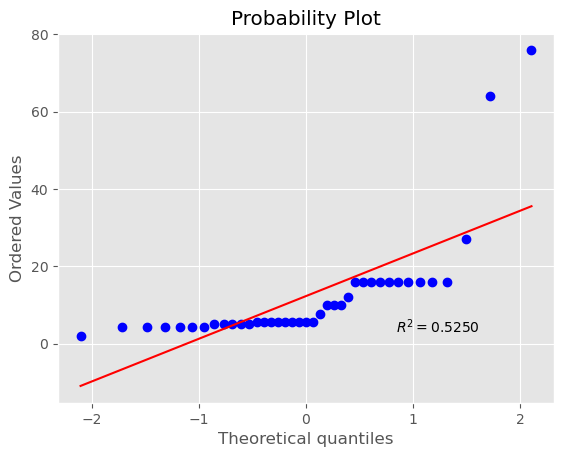

In [35]:
stats.probplot(df_WO['Ly'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

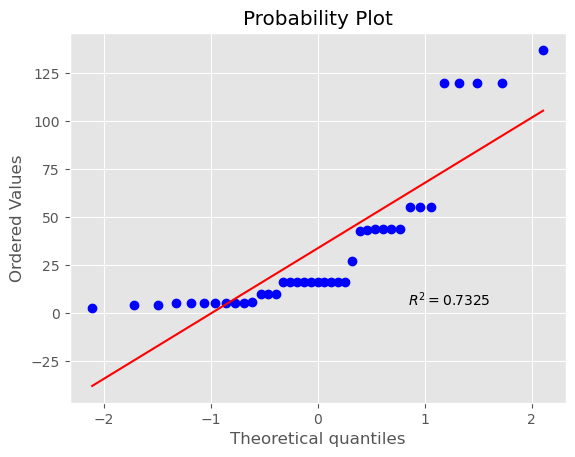

In [36]:
stats.probplot(df_WO['Lz'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

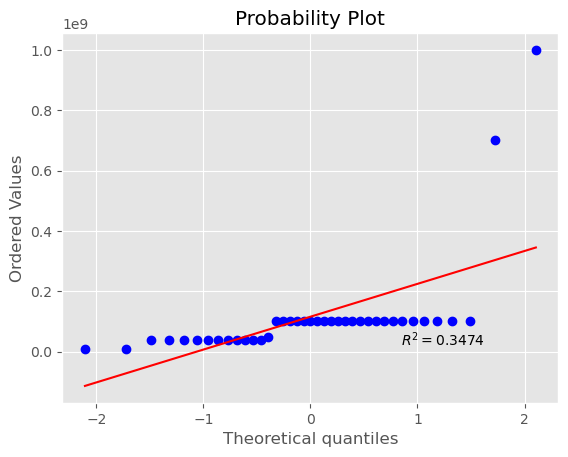

In [37]:
stats.probplot(df_WO['Srate'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

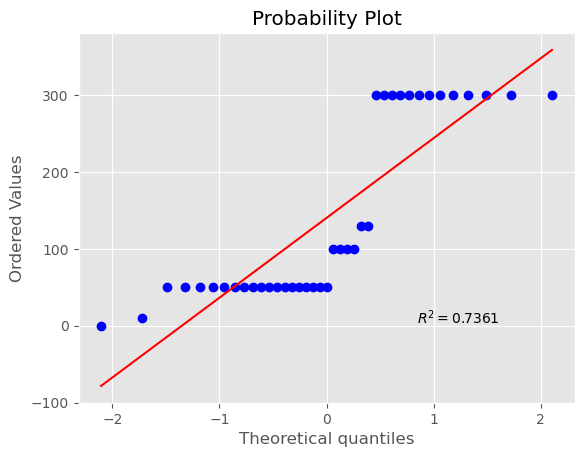

In [38]:
stats.probplot(df_WO['T'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

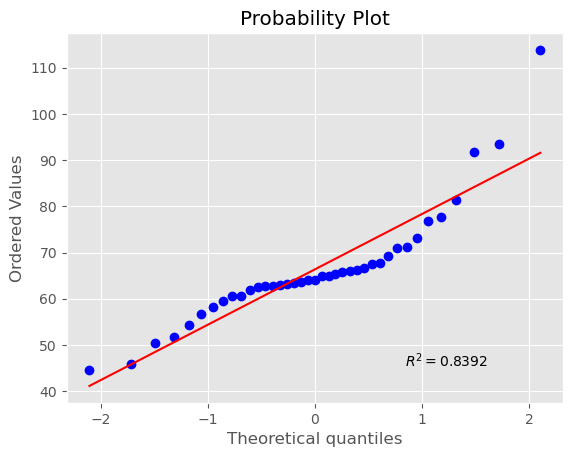

In [39]:
stats.probplot(df_WO['E'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

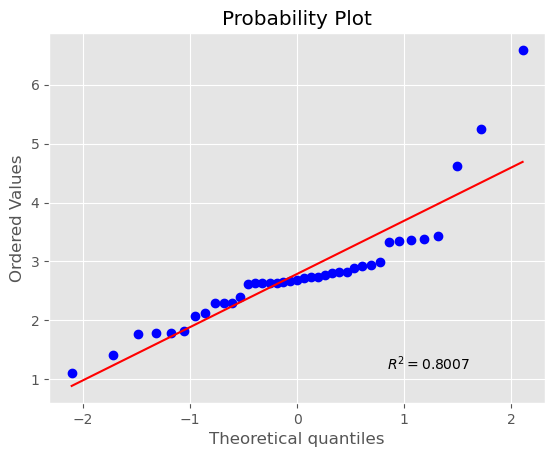

In [40]:
stats.probplot(df_WO['Smax'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

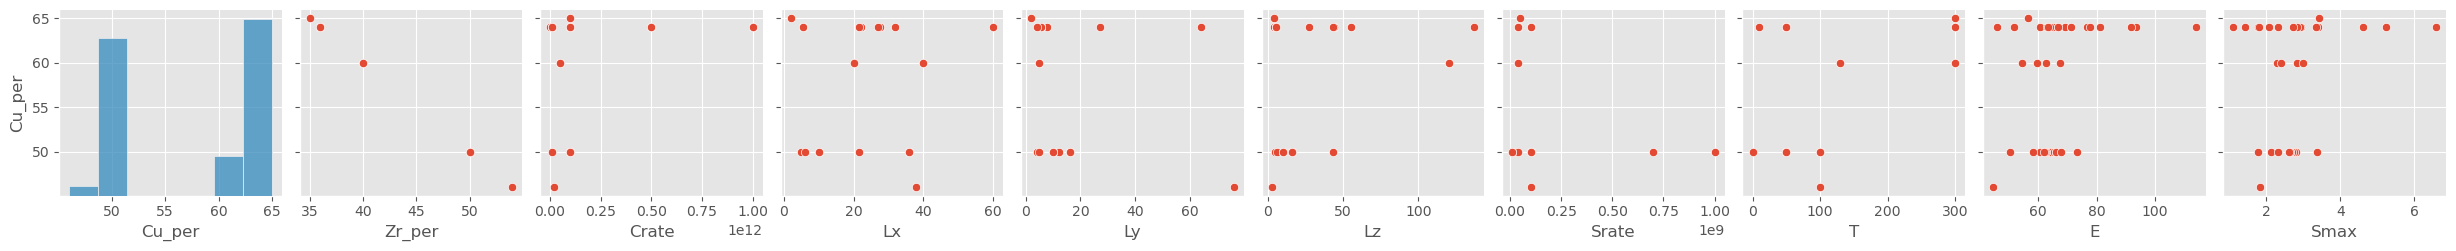

In [41]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Cu_per'])


relación inversa Cu vs Zr

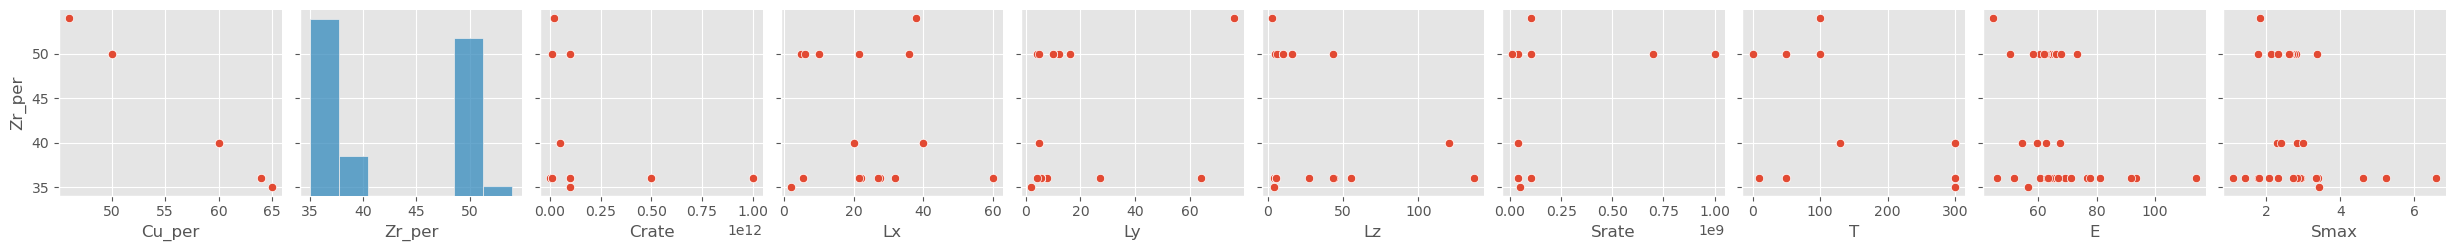

In [42]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Zr_per'])


relación inversa entre Zr y Cu

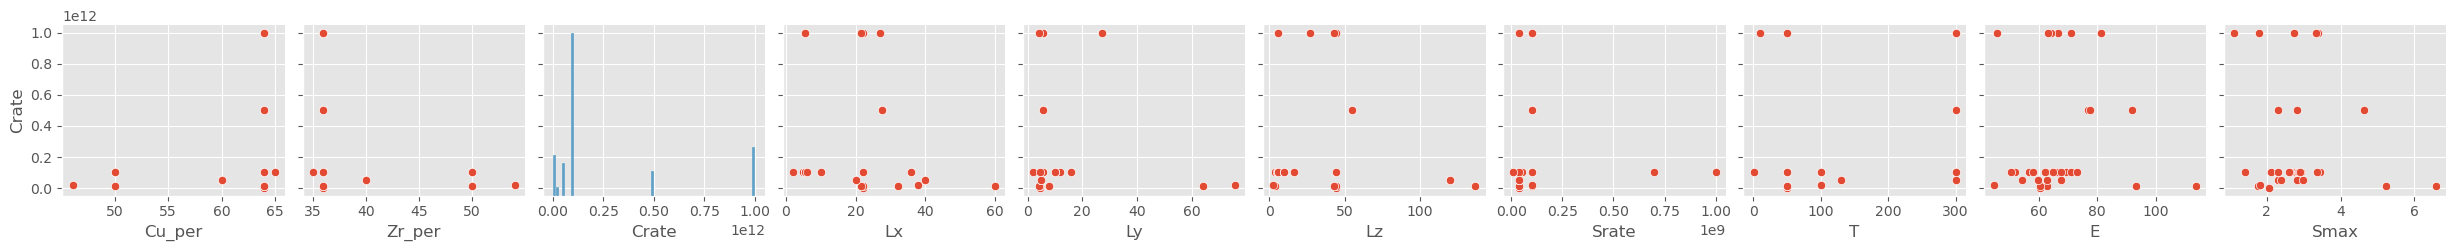

In [43]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Crate'])


no se observan relaciones entre las variables

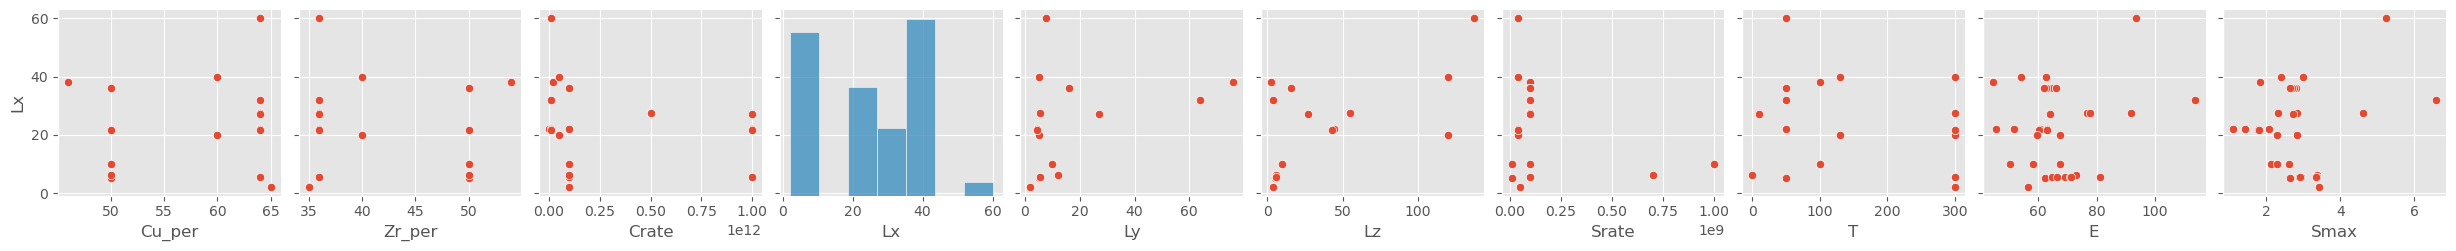

In [44]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Lx'])


Se observa una pequeña relación entre Lx y Lz. Ly se nota una tendencia con ruido en los primeros valores

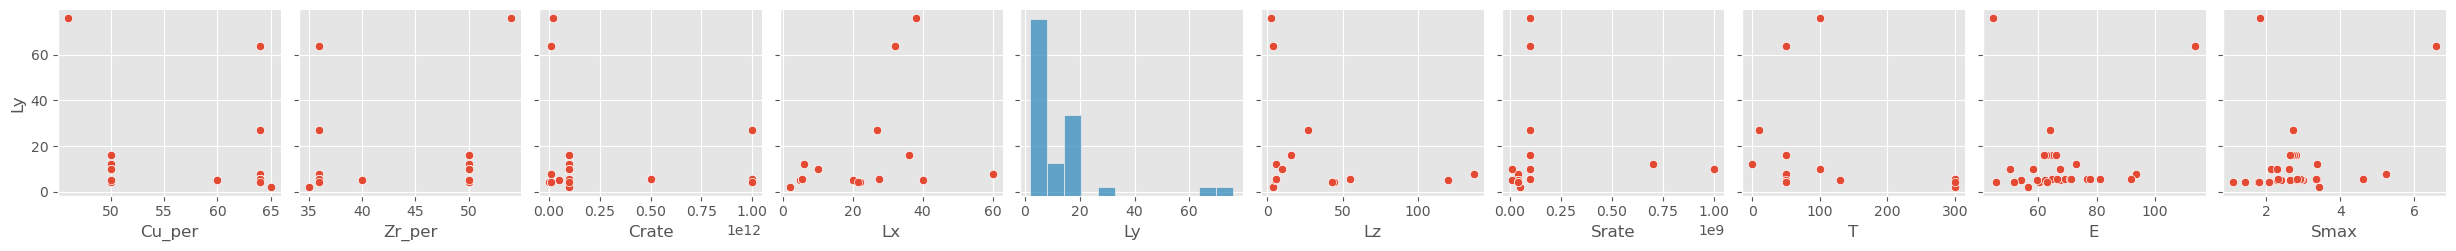

In [45]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Ly'])


Se observa una tendencia con Lx. Con Lz los valores tienden a la baja aproximadamente a los 40 nm.

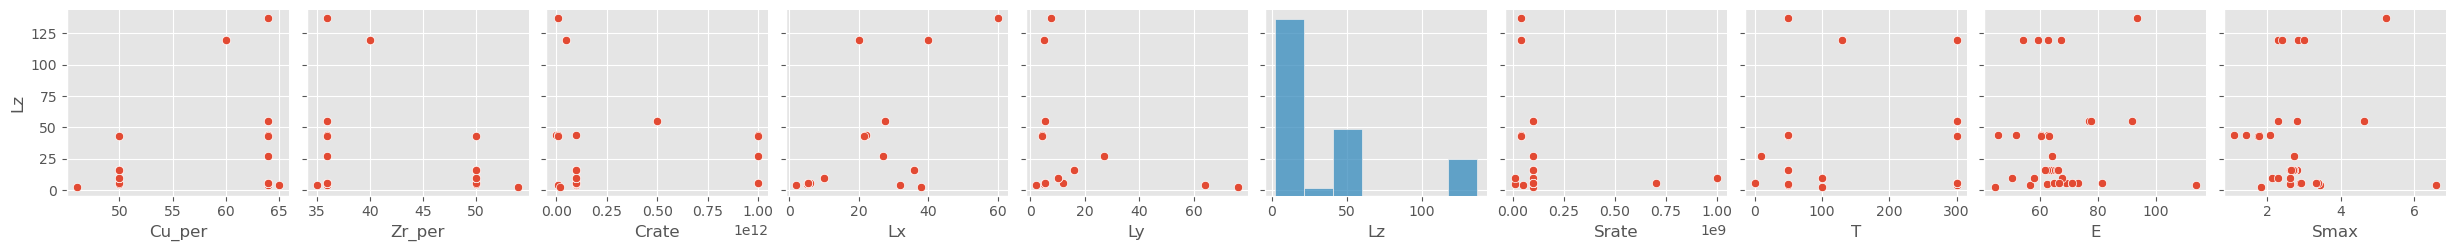

In [46]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Lz'])


Lz y Lx se observa una tendencia lineal.

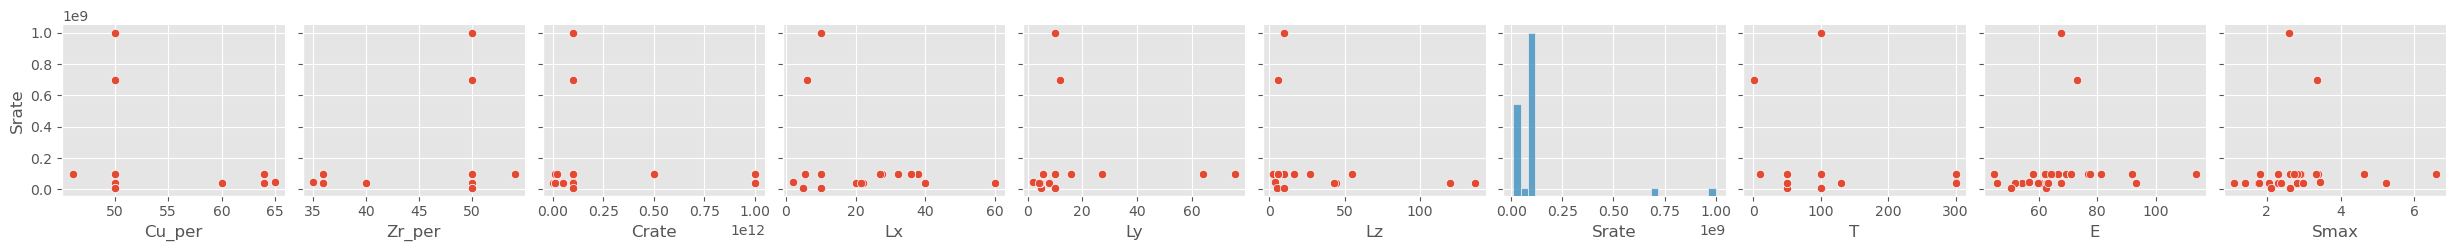

In [47]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Srate'])


Se observan dos datos anomalos que al sacarlos podrían presentar un relación raíz cuadrada

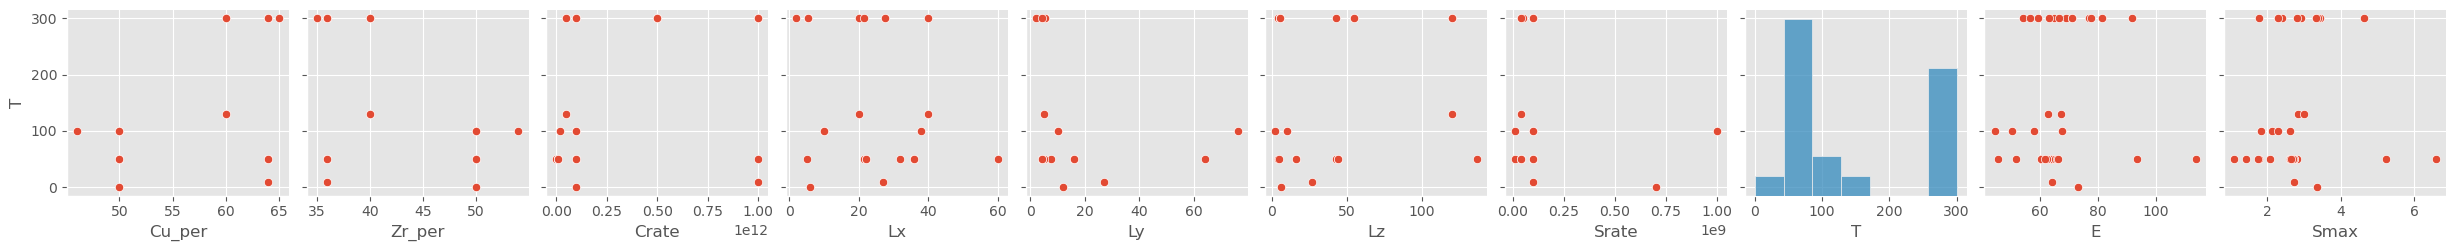

In [48]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['T'])


No se obersevan tendencias significativas. Existe un trend en los 300° app.

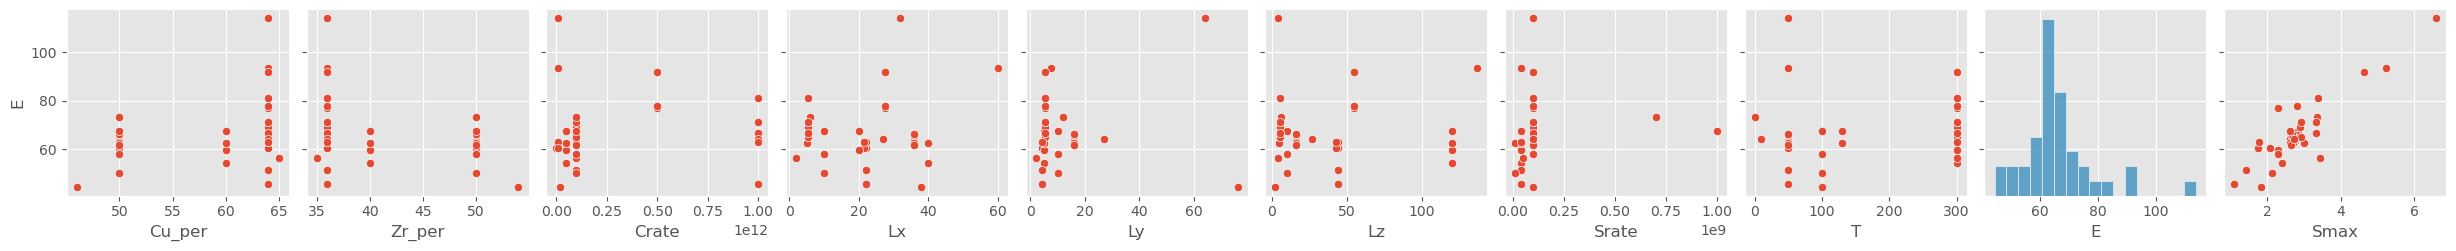

In [49]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['E'])


se observa una relación lineal con Smax

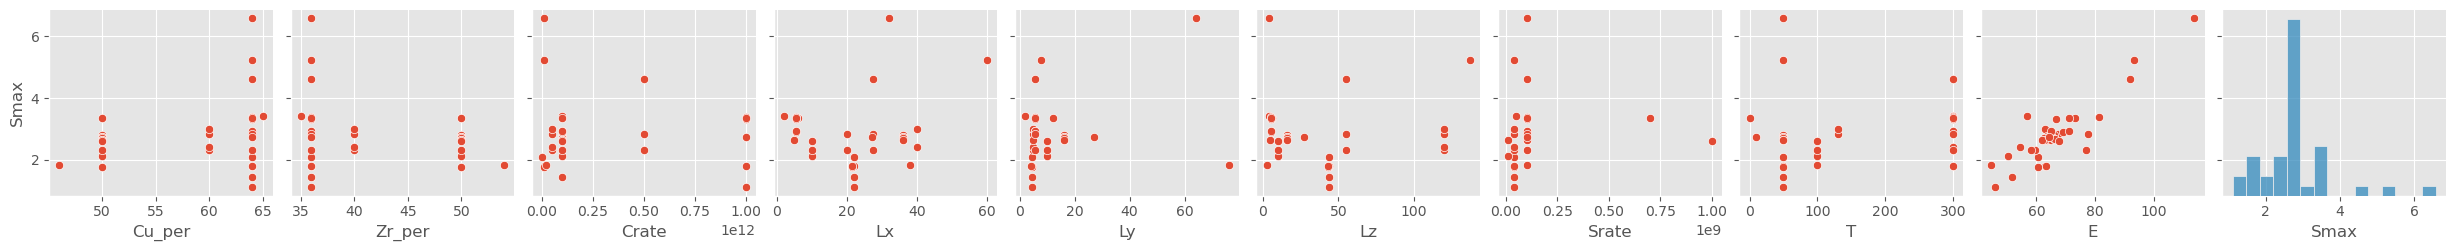

In [50]:
sns.pairplot(data=df_WO, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Smax'])
